# Data Analysis Project: E-Commerce Public Dataset

## Defining Business Questions

* Question 1: What is the average shipping cost for each seller’s city in the state of Sao Paulo?
* Question 2: What is the relationship between installment payments and total payments in transactions made using credit cards?
* Question 3: What percentage of orders were delivered later than the estimated delivery date, and what review scores did customers give for those orders?
* RFM Question: How are customers segmented based on Recency, Frequency, and Monetary value of their transactions in the past year, and which segment is the most promising for targeted promotions?

## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
ordersItems_df = pd.read_csv('data/order_items_dataset.csv')
ordersItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [4]:
ordersPayments_df = pd.read_csv('data/order_payments_dataset.csv')
ordersPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
ordersReviews_df = pd.read_csv('data/order_reviews_dataset.csv')
ordersReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**

* *order\_items\_dataset.csv* and *sellers\_dataset.csv* are used to answer question 1.
* *order\_payments\_dataset.csv* is used to answer question 2.
* *orders\_dataset.csv* and *order\_reviews\_dataset.csv* are used to answer question 3.
* *orders\_dataset.csv*, *order\_items\_dataset.csv*, and *customers\_dataset.csv* are used for advanced analysis (RFM question).

### Assessing Data

In [8]:
ordersItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
ordersItems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [10]:
ordersItems_df.duplicated().sum()

0

In [11]:
ordersItems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [12]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [14]:
sellers_df.duplicated().sum()

0

In [15]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [16]:
ordersPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [17]:
ordersPayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
ordersPayments_df.duplicated().sum()

0

In [19]:
ordersPayments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [20]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
orders_df.duplicated().sum()

0

In [23]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [24]:
ordersReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
ordersReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [26]:
ordersReviews_df.duplicated().sum()

0

In [27]:
ordersReviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [28]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
customers_df.duplicated().sum()

0

In [31]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**

* *order\_df* and *orderReviews\_df* have data type errors and missing values.

### Cleaning Data

In [32]:
orders_df.dropna(axis=0, inplace=True)

In [33]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [35]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [36]:
ordersReviews_df.dropna(axis=0, inplace=True)

In [37]:
ordersReviews_df["review_creation_date"] = pd.to_datetime(ordersReviews_df["review_creation_date"])

In [38]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [39]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**

* *order\_df* and *orderReviews\_df* have been cleaned.

## Exploratory Data Analysis

### Explore Question 1

In [40]:
ordersItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [41]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [42]:
merge_df = pd.merge(ordersItems_df, sellers_df, on='seller_id')

In [43]:
spSellers_df = merge_df[merge_df['seller_state'] == 'SP']

In [44]:
avgFreightbyCity_df = spSellers_df.groupby('seller_city')['freight_value'].mean().reset_index()

In [45]:
avgFreightbyCity_df = avgFreightbyCity_df.sort_values(by='freight_value', ascending=False)
avgFreightbyCity_df.head()

,seller_city,freight_value
30,bofete,126.496667
38,caieiras,124.760000
121,londrina,101.700000
214,sao paluo,79.334444
107,jaci,62.118571


### Explore Question 2

In [46]:
ordersPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [47]:
creditCards_df = ordersPayments_df[ordersPayments_df['payment_type'] == 'credit_card']

In [48]:
creditCards_df[['payment_installments', 'payment_value']].corr()

,payment_installments,payment_value
payment_installments,1.000000,0.376498
payment_value,0.376498,1.000000


### Explore Question 3

In [49]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [50]:
ordersReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02


In [51]:
orders_df['late_delivery'] = orders_df['order_delivered_customer_date'] > orders_df['order_estimated_delivery_date']

In [52]:
latePercentage = orders_df['late_delivery'].mean() * 100
print(f"Percentage of late orders: {latePercentage:.2f}%")

Percentage of late orders: 8.11%


In [53]:
reviews_df = pd.merge(orders_df, ordersReviews_df, on='order_id')

In [54]:
reviews_df = reviews_df.groupby('late_delivery')['review_score'].mean().reset_index()
reviews_df.head()

,late_delivery,review_score
0,False,4.040078
1,True,2.583333


**Insight:**

* Explore Question 1: The city **Bofete** has the highest average shipping cost, followed by **Caieiras**, while **Jaci** has the lowest average shipping cost among the analyzed cities.
* Explore Question 2: There is a significant positive correlation between the number of installments and the total payment, indicating that the longer the installment period chosen by customers, the higher the transaction value.
* Explore Question 3: Late orders have a lower average review score compared to on-time orders, showing that delivery delays negatively impact customer satisfaction.

## Visualization & Explanatory Analysis

### Question 1:

/tmp/ipykernel_17253/1480287794.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_city', y='freight_value', data=avgFreightbyCity_df, palette=colors)


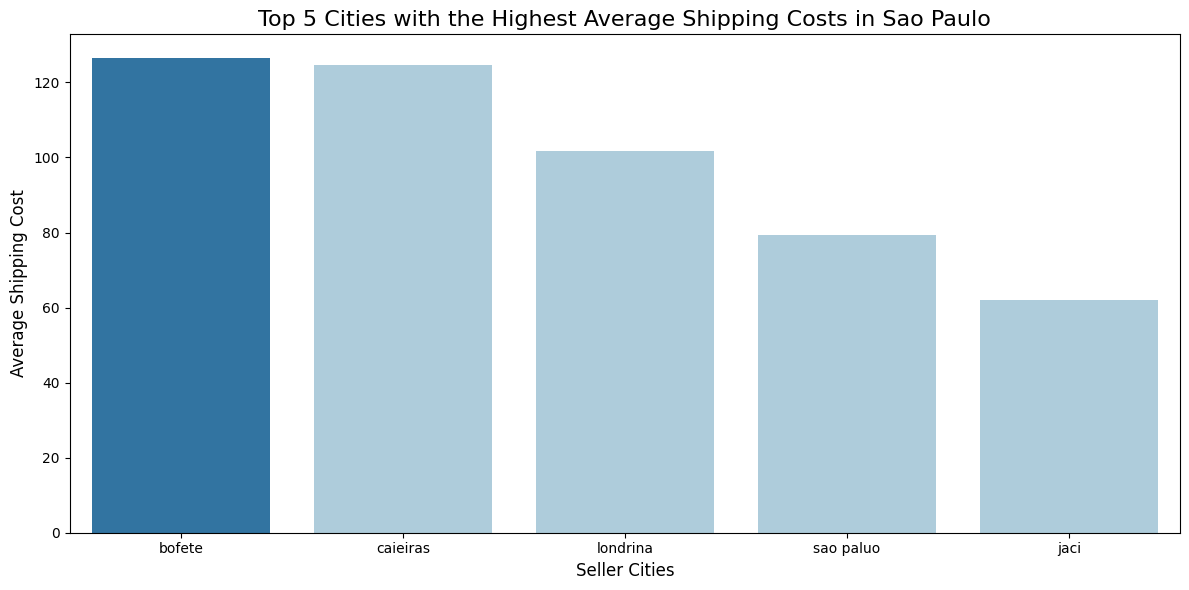

In [55]:
avgFreightbyCity_df = avgFreightbyCity_df.sort_values(by='freight_value', ascending=False).head(5)

colors = ['#1f77b4' if i == 0 else '#a6cee3' for i in range(len(avgFreightbyCity_df))]

plt.figure(figsize=(12,6))

sns.barplot(x='seller_city', y='freight_value', data=avgFreightbyCity_df, palette=colors)

plt.title('Top 5 Cities with the Highest Average Shipping Costs in Sao Paulo', fontsize=16)

plt.xlabel('Seller Cities', fontsize=12)
plt.ylabel('Average Shipping Cost', fontsize=12)

plt.tight_layout()
plt.show()

### Question 2:

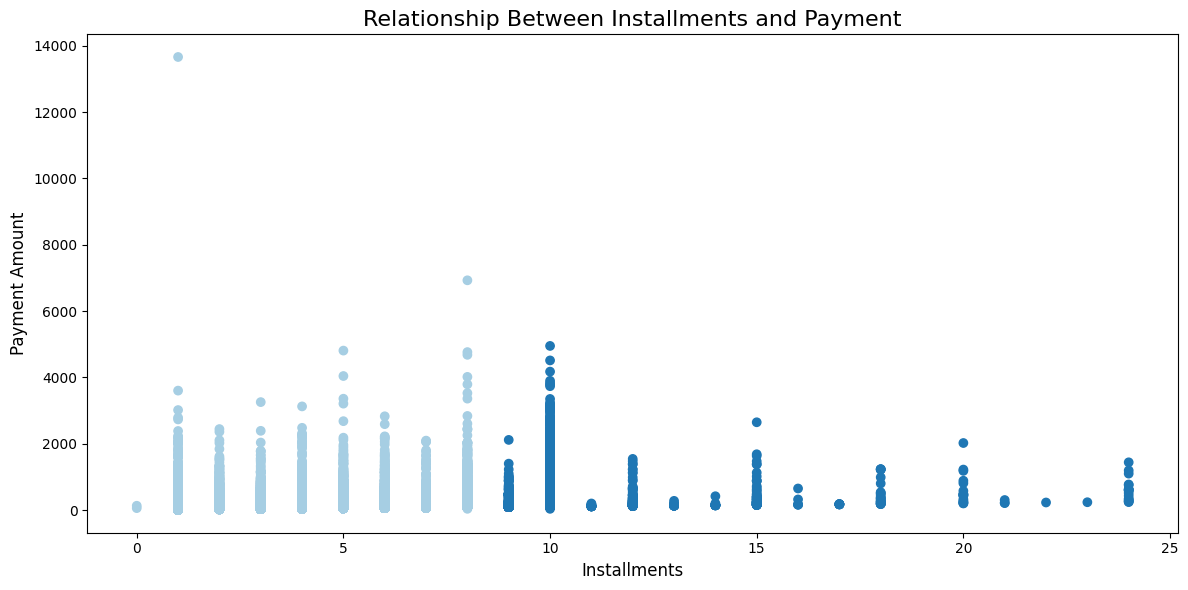

In [56]:
colors = ['#1f77b4' if x > 8 else '#a6cee3' for x in creditCards_df['payment_installments']]

plt.figure(figsize=(12, 6))
plt.scatter(creditCards_df['payment_installments'], creditCards_df['payment_value'], c=colors)

plt.title('Relationship Between Installments and Payment', fontsize=16)
plt.xlabel('Installments', fontsize=12)
plt.ylabel('Payment Amount', fontsize=12)

plt.tight_layout()
plt.show()

### Question 3:

/tmp/ipykernel_17253/2049379567.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='late_delivery',y='review_score', data=reviews_df, palette=colors)


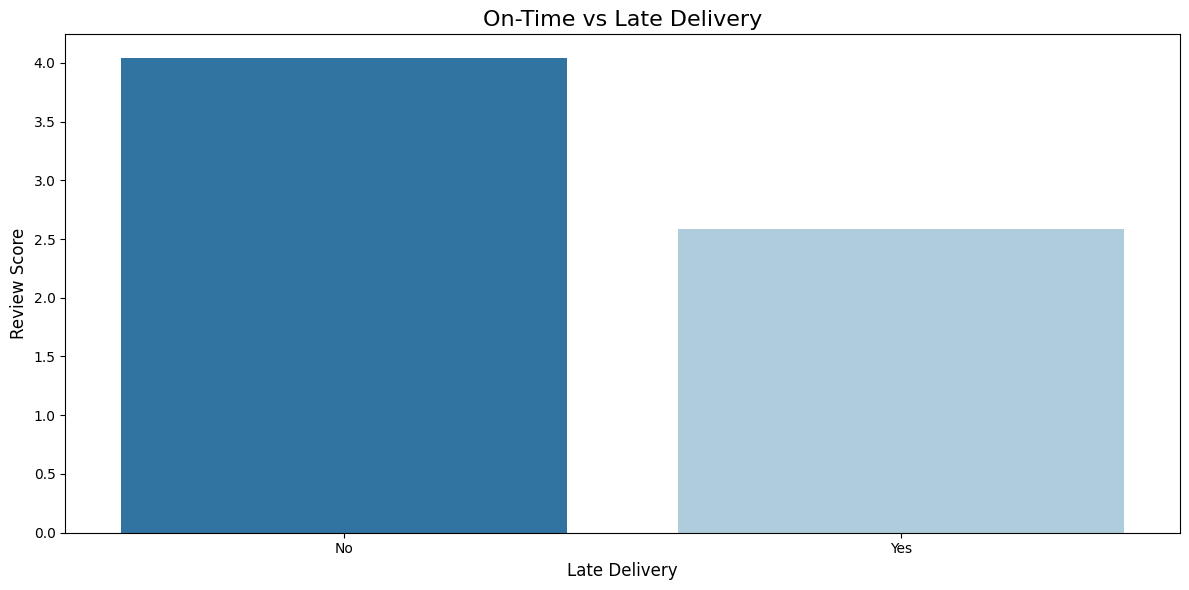

In [57]:
colors = {"False": "#1f77b4", "True":  '#a6cee3'}

plt.figure(figsize=(12, 6))
sns.barplot(x='late_delivery',y='review_score', data=reviews_df, palette=colors)

plt.title('On-Time vs Late Delivery', fontsize=16)
plt.xlabel('Late Delivery', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

**Insight:**

* Question 1: Bofete has the highest average shipping cost among the cities, while Jaci has the lowest, indicating variation in logistics costs across seller locations in Sao Paulo.
* Question 2: Customers who choose more installments tend to make higher-value purchases, suggesting that installment options encourage greater buying power.
* Question 3: About 8.11% of orders were delivered late, and late orders received lower review scores, showing that delivery delays negatively affect customer satisfaction.

## Advanced Analysis

### Explore RFM

In [58]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,late_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,False
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,False


In [59]:
ordersItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [60]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [61]:
lastYearOrders_df = orders_df[orders_df['order_purchase_timestamp'] >= '2018-01-01']

In [62]:
merge_df = lastYearOrders_df.merge(customers_df, on='customer_id') \
                            .merge(ordersItems_df, on='order_id')

In [63]:
recency = merge_df['order_purchase_timestamp'].max()
rfm_df = merge_df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (recency - x.max()).days
}).rename(columns={'order_purchase_timestamp': 'Recency'})

In [64]:
frequency = merge_df.groupby('customer_unique_id')['order_id'].nunique().to_frame('Frequency')
rfm_df = rfm_df.merge(frequency, on='customer_unique_id')

In [65]:
monetary = merge_df.groupby('customer_unique_id')['price'].sum().to_frame('Monetary')
rfm_df = rfm_df.merge(monetary, on='customer_unique_id')

In [66]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], 3, labels=[3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 3, labels=[1, 2, 3])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], 3, labels=[1, 2, 3])

In [67]:
rfm_df['RFM_Segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

In [68]:
top_customers = rfm_df[rfm_df['RFM_Segment'] == '333']

**Insight:**

* Exploring RFM: Customers in the *333* RFM segment are the most loyal, recently active, frequent buyers with the highest spending, making them the most promising target for promotions or loyalty programs.

### RFM Question

/tmp/ipykernel_17253/3638425945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='RFM_Segment', palette=colors)


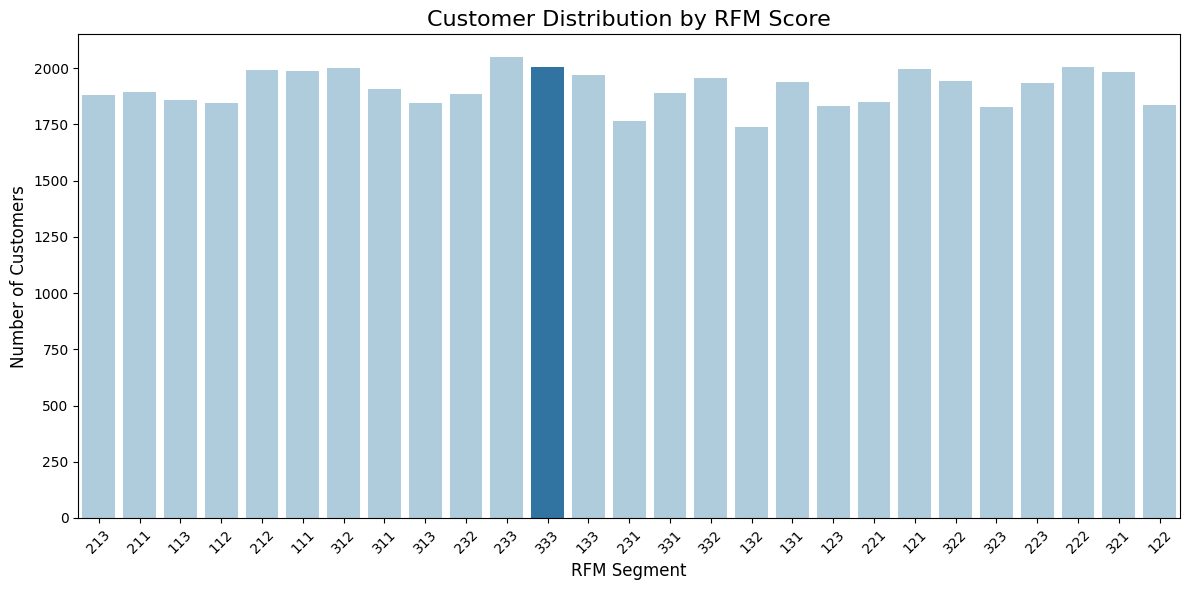

Pelanggan dengan segmen "333" (paling potensial) merupakan 3.89% dari total pelanggan.


In [69]:
colors = {'333': '#1f77b4'}
colors.update({segment: '#a6cee3' for segment in rfm_df['RFM_Segment'].unique() if segment != '333'})

plt.figure(figsize=(12, 6))

sns.countplot(data=rfm_df, x='RFM_Segment', palette=colors)

plt.title('Customer Distribution by RFM Score', fontsize=16)
plt.xlabel('RFM Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_customers_count = top_customers.shape[0]
total_customers_count = rfm_df.shape[0]

percentage_top_customers = (top_customers_count / total_customers_count) * 100

print(f'Pelanggan dengan segmen "333" (paling potensial) merupakan {percentage_top_customers:.2f}% dari total pelanggan.')

**Insight:**

* RFM Question: Customers in the *333* segment, although only *3.89%* of total customers, show high value in frequency, transaction amount, and recency, making them the primary target for promotions or loyalty programs.

## Conclusion

* Conclusion Question 1: By identifying the average shipping cost, the company can consider more efficient logistics strategies or pricing adjustments to improve competitiveness and reduce operational costs in those areas.
* Conclusion Question 2: The positive correlation between the number of installments and total payment opens business opportunities; offering more installment options can boost transaction values and expand consumer reach, especially for segments sensitive to upfront payments.
* Conclusion Question 3: Improving on-time delivery can directly increase customer satisfaction, reflected in higher review scores. Optimizing logistics and timely delivery will strongly impact customer loyalty, supporting business growth through positive recommendations and repeat purchases.
* Conclusion RFM Question: Focusing on customers in the *333* RFM segment, who make up *3.89%* of total customers, can have a significant impact since they are the most loyal, active, and highest-spending customers. Targeting them with special promotions or loyalty programs can increase retention and drive sustainable revenue growth.

## Save Dataset

In [70]:
avgFreightbyCity_df.head()

,seller_city,freight_value
30,bofete,126.496667
38,caieiras,124.760000
121,londrina,101.700000
214,sao paluo,79.334444
107,jaci,62.118571


In [71]:
avgFreightbyCity_df.to_csv("dashboard/avg_freight_by_city.csv", index=False)

In [72]:
creditCards_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [73]:
creditCards_df.to_csv("dashboard/credit_cards.csv", index=False)

In [74]:
reviews_df.head()

,late_delivery,review_score
0,False,4.040078
1,True,2.583333


In [75]:
reviews_df.to_csv("dashboard/reviews.csv", index=False)

In [76]:
rfm_df.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,2,1,3,213
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211
0004bd2a26a76fe21f786e4fbd80607f,145,1,154.00,2,1,3,213
00050ab1314c0e55a6ca13cf7181fecf,131,1,27.99,2,1,1,211
00053a61a98854899e70ed204dd4bafe,182,1,382.00,1,1,3,113


In [77]:
rfm_df.to_csv("dashboard/rfm.csv", index=False)